In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_narrow.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206, -3.2027341340615103], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]}


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std    	min    	max        
1  	500   	185640 	575506 	49.4426	2.04707e+06
2  	500   	192583 	588092 	48.5774	2.04707e+06
3  	500   	99267.8	427296 	33.8112	2.04663e+06
4  	500   	104113 	441257 	13.5895	2.04789e+06
5  	500   	50265.9	307579 	26.8115	2.0467e+06 
6  	500   	22373.9	198690 	17.5093	2.04234e+06
7  	500   	9442   	128629 	14.2876	2.04157e+06
8  	500   	5622.19	81299.8	14.2876	2.0382e+06 
9  	500   	5272.65	91160.2	14.2876	2.04246e+06
10 	500   	7329.06	103816 	14.2876	2.04478e+06
11 	500   	4406.16	73508.7	9.17923	2.04111e+06
12 	500   	2210.77	35185.8	8.5108 	1.11291e+06
13 	500   	3357.64	64423.9	7.28088	2.03856e+06
14 	500   	997.619	1701.13	7.28088	16211.7    
15 	500   	4209.9 	73345.1	5.76732	2.03817e+06
16 	500   	996.477	1737.21	5.46286	17798.1    
17 	500   	3473.56	49937.2	5.46286	1.11622e+06
18 	500   	6518.73	88520.1	4.35451	2.03877e+06
19 	500   	2351.41	35216.8	5.16157	1.11362e+06
20 	500   	3395.94	49740.3	5.03237	1.11399e+06
21 	500   	24

In [6]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [225.61922391732145, 0.05575974685857214, 0.011067167481656228, 0.06889854974172598, 76.93618832396082, 0.08747678435468578, 0.11311212549548497, 0.039409309079890834, 109.83635584925524, 0.11233612259608845, 2.253335153023493, 0.03809348735637206, 2.5643367585926846, 0.4818274129108538, 0.0677419582947596, 1.3532157211989733, 798.410512173095, 0.03876365478428303, 1.8629174559493822, 27.405788380838814, 6896.305058163212, 1.588382773177094, 4.302315682428842]
[0.11343622471936678, 0.0002147109465709934, 0.010815671480240452, 0.38788945929223284, 0.7475000000000211, 0.04149727874923638]
[<bluepyopt.objectives.Objective object at 0x7fffbe85aac0>, <bluepyopt.objectives.Objective object at 0x7fffbe7ee280>, <bluepyopt.objectives.Objective object at 0x7fffbe7ee2e0>, <bluepyopt.objectives.Objective object at 0x7fffbe7ee340>, <bluepyopt.objectives.Objective object at 0x7fffbe7ee3a0>, <bluepyopt.objectives.Objective object at 0x7fffbe7ee400>, <bluepyopt.objectives.Objective object

1
2
3
4


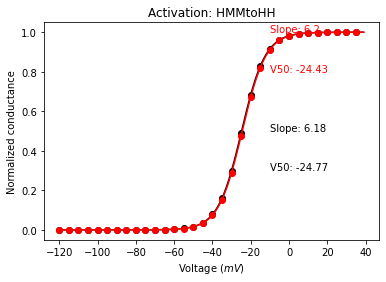

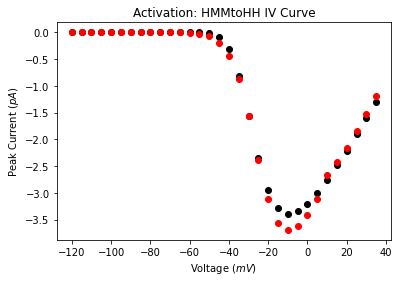

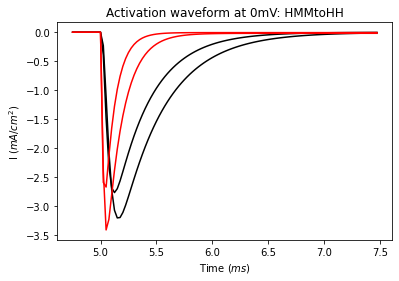

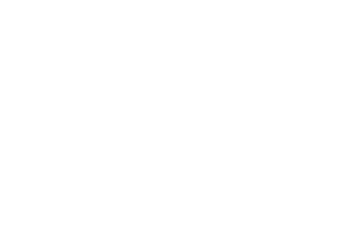

In [7]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

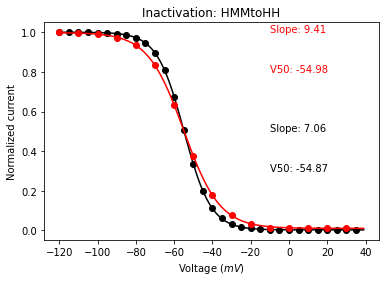

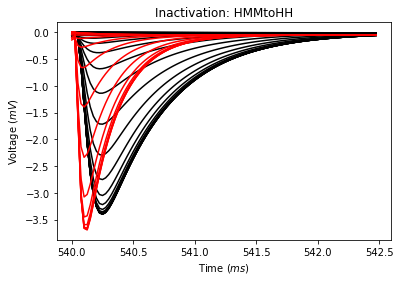

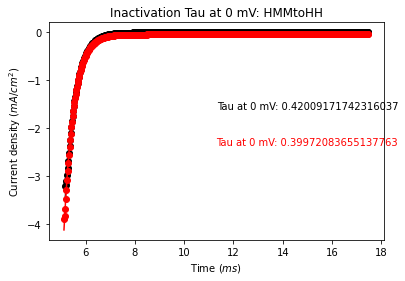

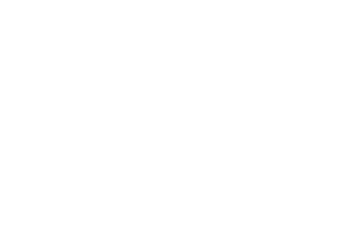

In [8]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

In [9]:
import eval_helper_na12mut8st as ehn8
import eval_helper_na12mut as ehn
import curve_fitting as cf
act_obj = ggsdHMM.Activation(channel_name='na16')

# Test HH Target data

In [10]:
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)

In [11]:
is_HMM = False 
wild_data = {}
# Create genSim objects
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)
act_obj = ggsd.Activation(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
peak_amp = ehn.find_peak_amp(act_obj,[14,33])
time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
inact_obj = ggsd.Inactivation(channel_name='na16')
#recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HH)

ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
#y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
# gv_slope, v_half_act, top, bottom = (1, 1, 1, 1)
# ssi_slope, v_half_inact, top, bottom = (1, 1, 1, 1)
# y0, plateau, percent_fast, k_fast, k_slow = (1, 1, 1, 1, 1)

# Ramp Protocol
# ramp = ggsdHMM.Ramp(channel_name=self.channel_name)
# ramp_area = ramp.areaUnderCurve
# persistent_curr = ramp.persistentCurrent()

wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test HMM

In [12]:
import curve_fitting as cf
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [13]:
print(gv_slope, v_half_act, top, bottom )

6.182889399959395 -24.766773947903665 1.0000000000116729 1.844638323009083e-10


In [14]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
           

In [15]:
print(ssi_slope, v_half_inact, top, bottom)

7.05877216715777 -54.872868637744034 0.002864608183022642 1.0008524331966844


In [16]:
import eval_helper as eh
import scoring_functions_relative as sf

objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
inact_obj = ggsdHMM.Inactivation(channel_name='na12mut8st')
# recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HMM)
recov_obj = None
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [17]:
import curve_fitting as cf
errors = []
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
if 'v_half_act' in objective_names:
    vhalf_act_error = (v_half_act - wild_data['v_half_act'])**2
    errors.append(vhalf_act_error)
if 'gv_slope' in objective_names:
    gv_slope_error = (gv_slope - wild_data['gv_slope'])**2
    errors.append(gv_slope_error)
if 'v_half_ssi' in objective_names:
    v_half_ssi_error = (v_half_inact - wild_data['v_half_ssi'])**2
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objective_names:
    ssi_slope_error = (ssi_slope - wild_data['ssi_slope'])**2
    errors.append(ssi_slope_error)
if 'peak_current' in objective_names:
    peak_amp = ehn.find_peak_amp(act_obj,[14,33])
    peak_amp_errors = np.sum([(peak_amp[i] - wild_data['peak_amp'][i])**2 for i in range(len(peak_amp))])
    errors.append(peak_amp_errors)
if 'ttp' in objective_names:
    time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
    time_to_peak_error = np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i])**2 for i in range(len(peak_amp))])
    errors.append(time_to_peak_error)
if 'tau0' in objective_names:
    act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
    eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)
    try:
        tau0 = ehn.find_tau0(act_obj)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except e:
        tau0_error = 1000
    errors.append(tau0_error)

print(errors)

[0.11343622471936678, 0.0002147109465709934, 0.010815671480240452, 5.529195219332172, 0.38788945929223284, 0.7475000000000211, 0.0004149727874923638]


In [18]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp']
 vhalf_act is: -24.42997100148044 WT:-24.766773947903665 error: 0.11343622471936678
 gv_slope is: 6.19754241830276 WT:6.182889399959395 error: 0.0002147109465709934
 v_half_ssi is: -54.97686705831012 WT:-54.872868637744034 error: 0.010815671480240452
 ssi_slope is: 9.41019625041714 WT:7.05877216715777 error: 5.529195219332172
 peak_current is: [-0.07700171420453154, -0.19439017949206241, -0.4384885835827713, -0.8819901623332741, -1.55889172826479, -2.378799070292641, -3.1119783007869644, -3.5634081461009512, -3.6923830515732328, -3.62458929070453, -3.409828029626099, -3.107374845781164, -2.6702029624572625, -2.428535869468627, -2.165544612113282, -1.8527201152898738, -1.5240119607321727, -1.198421166792858] WT:[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.3448

In [19]:
print(act_obj.ipeak_vec)

[-3.894474943178163]


In [20]:
cf.calc_act_obj(act_obj)

(5.916216024103028,
 -39.64894608140825,
 0.999999999995186,
 1.5234193678104693e-11)

In [21]:
print(act_obj.ipeak_vec[12])

-0.24723684334816845


In [22]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-0.2531170961103588


In [23]:
print(act_obj.t_vec[np.argmin(i12)])

24.999999999999115


In [24]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

19
[5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]
